# Objective: Your task is to improve retention by identifying high value customers and churn risks, and present your findings in the form of a single page report or dashboard.





Proposal From Analysis


**Action: Telecom should perform a Competitor analysis to offer more competitive packages and a better spread of devices offered in order to retain customers.** 
- Bulk of customers churn due to competitors
- Would be wise to re-evaluate plans offered, spread of devices offered


**Action: Investigate on demographics of customers Aged >60 to offer more attractive packages and better service that is tailored for them.**

- This age group generated the highest average total_revenue per customer
- However the churn rate for this group is the highest as well
- Reasons for this is due to Competitors & Poor Service
- Specific reason: Competitor offer better price, Competitor offer better devices
- Being able to come up with a package that is attractive to this demographic will definitely boost the revenue of the company.
- Additionally, improving service quality and support given to this demographics will greatly enhance retention rates.

**Action: Push out phone plans that have a longer term contract and uses credit card payment method.** 

- Consider partnering with credit card companies to come up with a promotion package to get customers to sign longer term contract.
- Analysis shows that payment by credit card and longer term contracts have the highest retention rates. 

**Action: Focus incentives/marketing efforts to get customers to stay for the first year.** 

- 1st year tenure churn rates are the highest of around 47.4%
- After 1st year, the churn rates drop to 28.7% in the 2nd year
- This churn rate value keeps dropping each year of tenure
- However, the biggest drop is from 1st year to 2nd year, therefore to be strategic in budget allocation, should focus on retaining first year customers. 

**Action: Pilot project in San Diego City for new mobile plans**
- San Diego City has one of the largest customer base of 285 customers, but also a high churn rate of 64.9%. 
- Almost all the reasons stated for churn is due to "competitors have better offers"
- Re-evaluate plans to retain these customers

**Noted that San Diego city customers generate the least revenue per customer of $2591. Nonetheless big customer base still significant to focus efforts in customer retention for this state. 

**Action: Improvements in Internet Service architecture/data plans**
- Customers with internet service churn 31.8%
- Customers with no internet service churn 7.4%
- Highest revenue per customer generating city, Sacramento, have internet service/ better data plans as one of the key reasons for leaving. 
- Could work on this area to better retain customers














# Read Data

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#Read Data
churn_df = pd.read_csv("telecom_customer_churn.csv")
zippop_df = pd.read_csv("telecom_zipcode_population.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(churn_df.shape)
# remove spaces in columns name
churn_df.columns = churn_df.columns.str.replace(' ','_')
churn_df.head(3)


(7043, 38)


,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices


In [4]:
# /done/ Look at [Tenure in Months] Vs [Customer Status] --> Do people that have long tenure tend to churn or short tenure? --> Dont really affect revenue, little correlation
# /done/ Do people with [Phone Service] tend to stay?, Do people with [Multiple Lines] tend to stay?, Do people with [Internet Service] tend to stay? 
# /done/ Look at [Contract] Vs [Customer Status] --> Do people with month-to-month/one year/ 2 year tend to churn?
# [Customer Status] Vs [Number of Dependents] Vs [Monthly Charge] OR [Total Charges] --> Hypothesis, people who have more dependents spend more and tend to churn less
# Look at across [City] to see which city spends the most 
# /done/ Demographics: [Age], [Gender], [Married] --> Do they spend more? --> Age 19-29 Spends decently high, with volume & >70 Spends most but small volume --> Age >70yrs tend to churn compared to Age 19-29 --> Could we do something to retain these customers?


In [5]:
#Get info of the dataset
churn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number_of_Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip_Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number_of_Referrals                7043 non-null   int64  
 10  Tenure_in_Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [6]:
#statistical description of count, std, mean
churn_df.describe() 

,Age,Number_of_Dependents,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [7]:
churn_df["Customer_Status"].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer_Status, dtype: int64

In [8]:
churn_df["Churn_Reason"].value_counts()

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn_Reason, 

In [9]:
#There are 120 rows with Negative Monthly Charges --> We shall remove them only when making comparisons with monthly charges, otherwise they still contain useful info
churn_df[churn_df["Monthly_Charge"] < 0]

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
32,0052-DCKON,Male,28,Yes,0,Los Angeles,90063,34.044271,-118.185237,9,...,Bank Withdrawal,-2.0,7942.15,0.00,0,2888.82,10830.97,Stayed,NaN,NaN
170,0274-JKUJR,Male,21,Yes,2,Los Angeles,90040,33.994524,-118.149953,9,...,Credit Card,-3.0,465.70,0.00,0,0.00,465.70,Stayed,NaN,NaN
232,0361-HJRDX,Female,38,No,0,Sherman Oaks,91403,34.147149,-118.463365,0,...,Credit Card,-8.0,4539.60,0.00,130,0.00,4669.60,Stayed,NaN,NaN
336,0495-ZBNGW,Male,78,Yes,0,Loma Mar,94021,37.266388,-122.263080,1,...,Bank Withdrawal,-1.0,343.95,0.00,20,33.30,397.25,Churned,Competitor,Competitor offered more data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6894,9793-WECQC,Male,53,No,0,Foresthill,95631,39.031876,-120.811141,0,...,Credit Card,-1.0,2192.90,0.00,0,1108.83,3301.73,Stayed,NaN,NaN
6918,9821-BESNZ,Male,43,No,0,Northridge,91325,34.236683,-118.517588,0,...,Bank Withdrawal,-7.0,6860.60,44.00,0,2179.32,8995.92,Stayed,NaN,NaN
6976,9898-KZQDZ,Female,65,Yes,0,Lee Vining,93541,37.890145,-119.184087,1,...,Credit Card,-1.0,3640.45,0.00,0,1980.00,5620.45,Churned,Competitor,Competitor had better devices
7020,9961-JBNMK,Male,79,No,0,Desert Center,92239,33.889605,-115.257009,0,...,Bank Withdrawal,-1.0,2030.30,10.20,0,887.67,2907.77,Churned,Dissatisfaction,Product dissatisfaction


# Correlation Plot

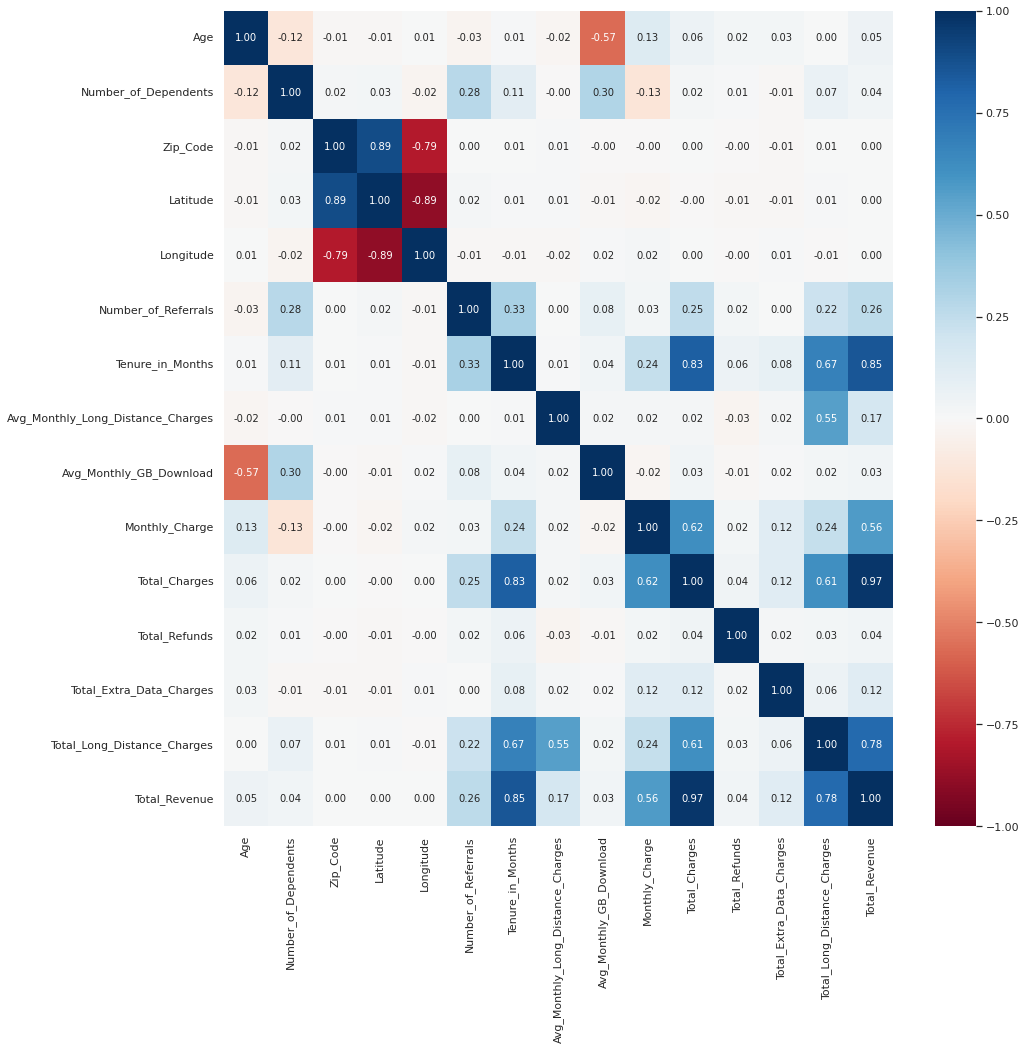

In [10]:
#churn_df.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sb.heatmap(churn_df.corr(), vmin = -1, vmax = 1, annot = True, fmt= ".2f" ,cmap = "RdBu")


In [11]:
#From Correlation: [Total Revenue] Correlates to [Tenure in Months] --> Longer term, they spend more? or isit just due to the way they calculate. by quarter so if u stay longer means more cost rather thn u just leave and only spend 1 month
#[Age] Vs Monthly GB Download is negatively correlated --> Older people use less Gb, Younger people use more Gb


# Gender Vs Other Variables & Churn

In [12]:
# Filtering out only "Stayed"  Customers
stay_df =churn_df[churn_df["Customer_Status"].str.contains('Stayed')==True]
stay_df=stay_df.reset_index(drop=True)
print(stay_df.shape)
stay_df.head()

(4720, 38)


,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
3,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
4,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN


In [13]:
# Filtering out only "Churned"  Customers
left_df =churn_df[churn_df["Customer_Status"].str.contains('Churned')==True]
left_df=left_df.reset_index(drop=True)
print(left_df.shape)
left_df.head()

(1869, 38)


,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
1,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
2,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
3,0022-TCJCI,Male,79,No,0,Daly City,94015,37.680844,-122.481310,0,...,Credit Card,62.7,2791.50,0.0,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
4,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,...,Bank Withdrawal,25.1,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer


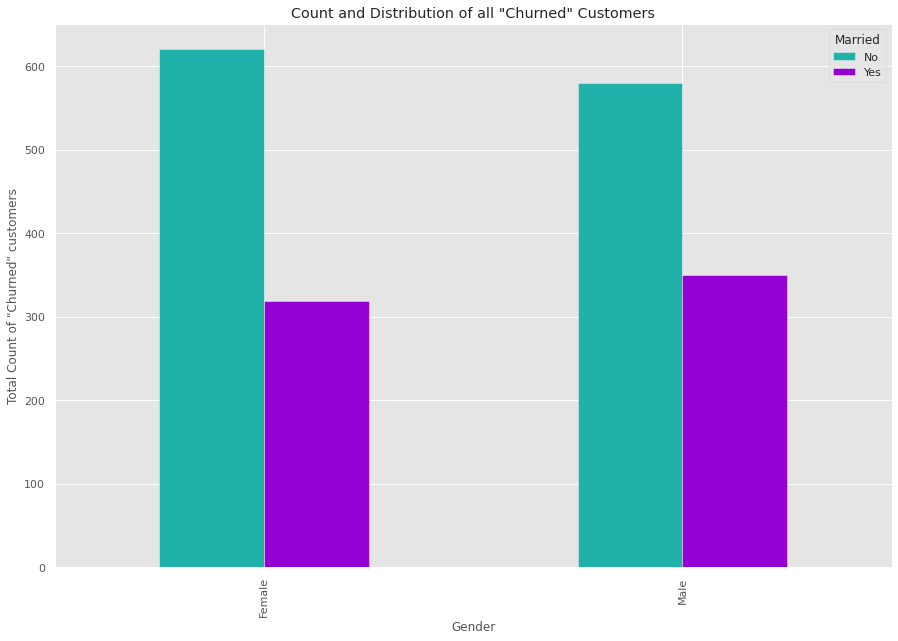

In [14]:
# plotting share/frequency of all Churned customers over the day to identify problem areas
plt.style.use('ggplot')
colors = ["#20B2AA", "#9400D3"]
left_df.groupby(['Gender','Married']).Married.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "Churned" Customers')
plt.xlabel('Gender')
plt.ylabel('Total Count of "Churned" customers')
plt.show()

Consistently for both Female and Male, single customers tend to churn more compared to married ones

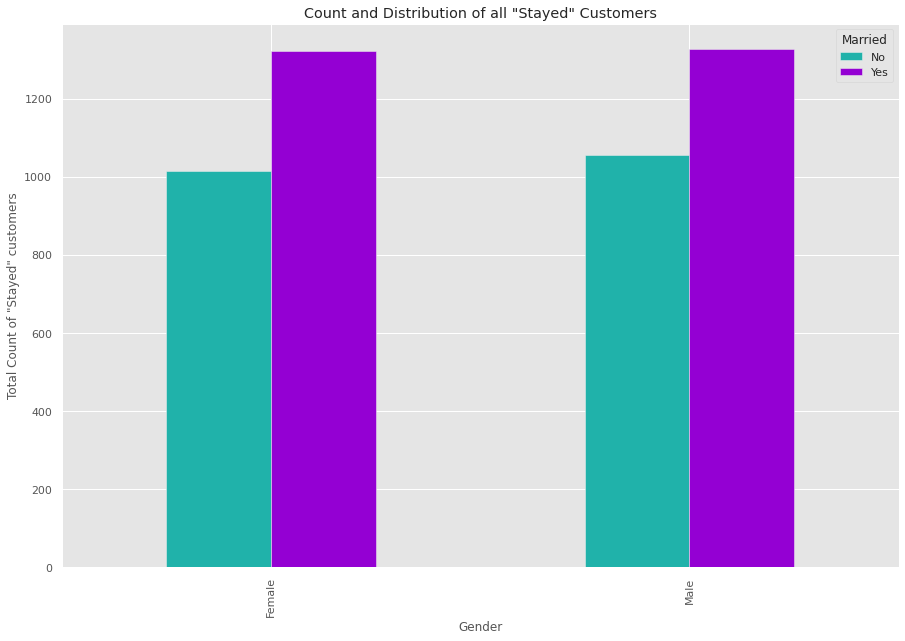

In [15]:
# plotting share/frequency of all Stayed customers over the day to identify problem areas
plt.style.use('ggplot')
colors = ["#20B2AA", "#9400D3"]
stay_df.groupby(['Gender','Married']).Married.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "Stayed" Customers')
plt.xlabel('Gender')
plt.ylabel('Total Count of "Stayed" customers')
plt.show()

Married Individuals Stay more for both males and females. This is consistent with our previous findings.

# Type of Payment & Churn

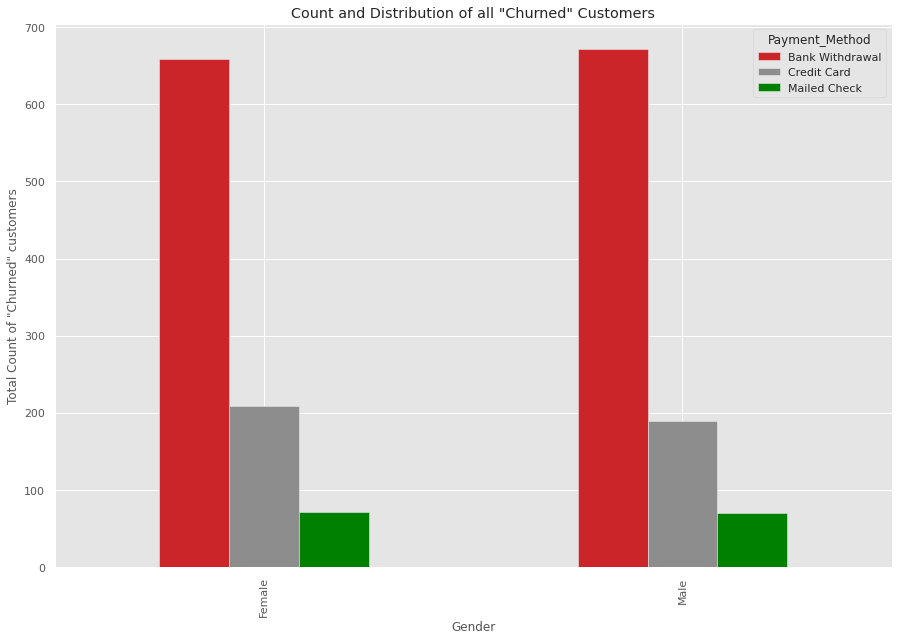

In [16]:
# plotting share/frequency of all Churned customers over the day to identify problem areas
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
left_df.groupby(['Gender','Payment_Method']).Payment_Method.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "Churned" Customers')
plt.xlabel('Gender')
plt.ylabel('Total Count of "Churned" customers')
plt.show()

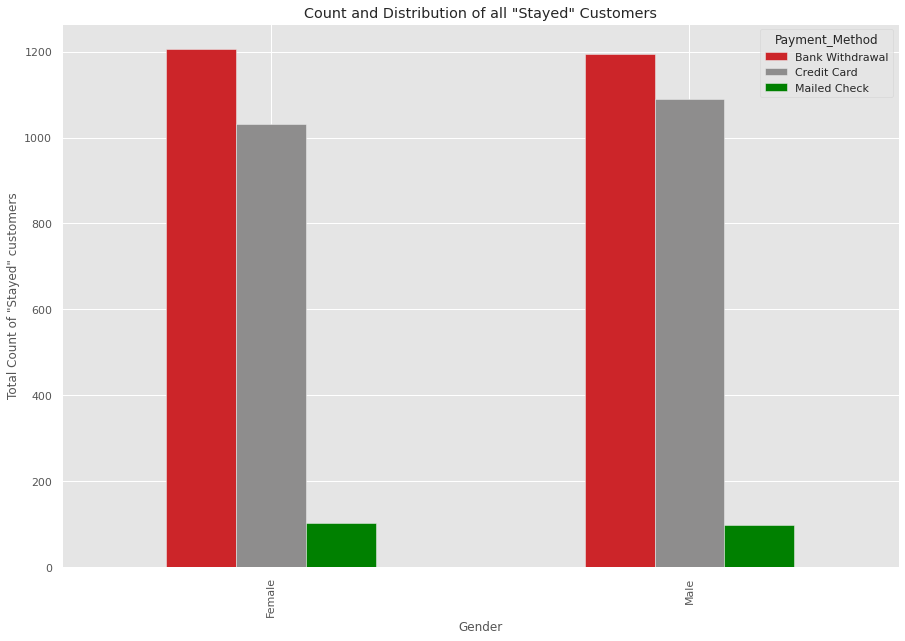

In [17]:
# plotting share/frequency of all Stayed customers over the day to identify problem areas
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
stay_df.groupby(['Gender','Payment_Method']).Payment_Method.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "Stayed" Customers')
plt.xlabel('Gender')
plt.ylabel('Total Count of "Stayed" customers')
plt.show()

Perhaps People who use credit cards tend to Churn less? Based on the above 2 charts. We reconfirm this by plotting the pie charts

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f80358727d0>,
      dtype=object)

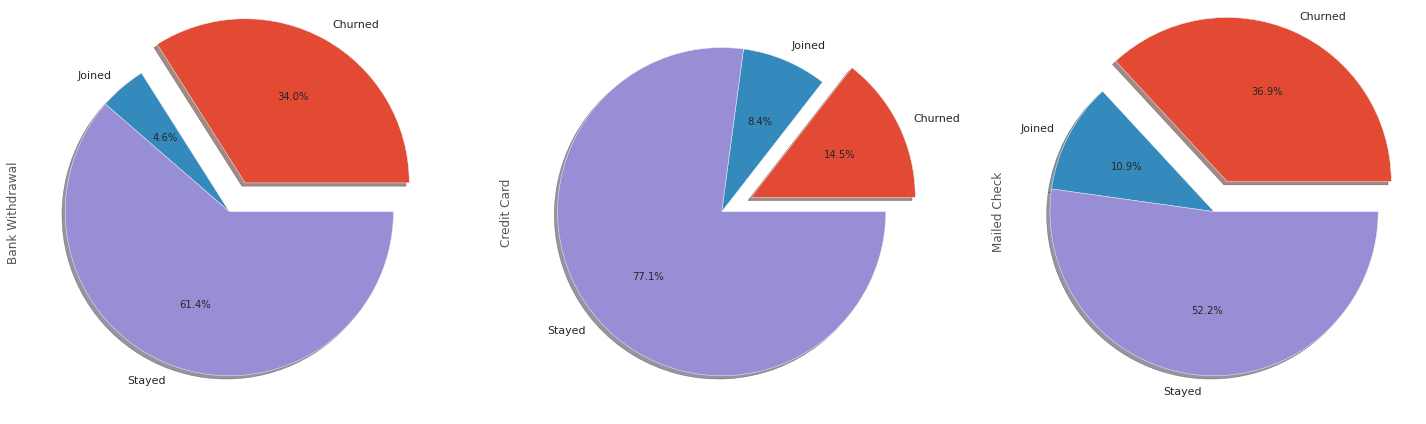

In [18]:
#Obtaining Pie Chart Proportions for Churned customers based on Payment_Method
df = pd.DataFrame(churn_df[["Payment_Method", "Customer_Status"]])
df = df.groupby(['Customer_Status','Payment_Method']).size().unstack(fill_value=0)
df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0,0], shadow = True,legend=False)


This Pie Chart confirms that People who used Credit Card tends to have lesser churn rates and stay more

# Age Group Vs Churn

In [19]:
#Converting Age group into ranges
churned_df = churn_df.copy()
bins= [19,30,40,50,60,70,80]
labels = ['19-29','30-39','40-49','50-59','60-69','>70']
churn_df['Age'] = pd.cut(churn_df['Age'], bins=bins, labels=labels, right=False)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f803a2ea690>,
      dtype=object)

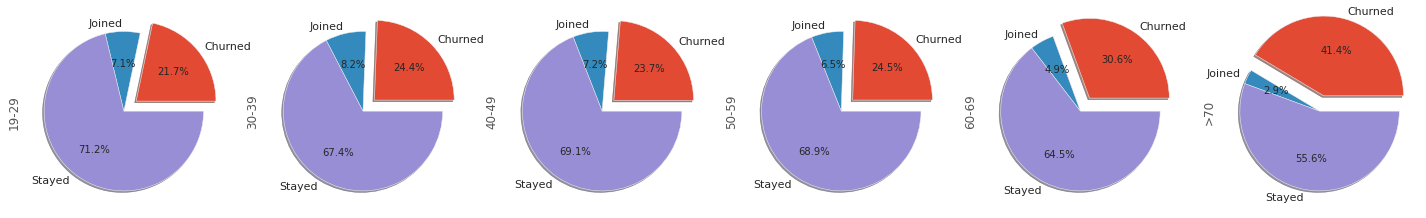

In [20]:
#Obtaining Pie Chart Proportions for Churned customers based on Age
df = pd.DataFrame(churn_df[["Age", "Customer_Status"]])
df = df.groupby(['Customer_Status','Age']).size().unstack(fill_value=0)
df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0,0], shadow = True,legend=False)


Interestingly, people >60 years old have higher churn rates --> Let us investigate more on why this is the case.

In [21]:
#Get the median revenue generated for each age groups
df = pd.DataFrame(churn_df[["Age", "Total_Revenue"]])
df.groupby('Age').mean()



,Total_Revenue
Age,
19-29,2967.899807
30-39,2955.047172
40-49,2900.059754
50-59,2941.853706
60-69,3115.426056
>70,3563.412542


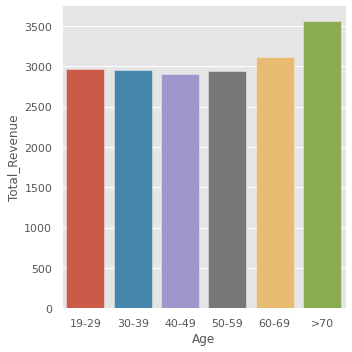

In [22]:
#bar chart for average revenue
test_df = df.groupby('Age').mean()
test_df = test_df.reset_index()
sb.catplot(x = 'Age', y='Total_Revenue', data = test_df, kind = 'bar')

In [23]:
#df.plot.bar() #(kind = 'bar', color = ['r','g','b','y','c','m'])

In [24]:
df.groupby('Age').median()


,Total_Revenue
Age,
19-29,2072.750
30-39,1944.545
40-49,1918.100
50-59,1993.240
60-69,2204.755
>70,2916.365


19-29    1401
40-49    1342
30-39    1266
50-59    1252
60-69    1004
>70       712
Name: Age, dtype: int64


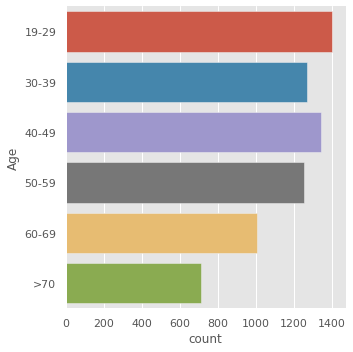

In [25]:
#Count plot of age groups
print(churn_df["Age"].value_counts())
sb.catplot(y = "Age", data = churn_df, kind = "count") 


Age 19-29 Forms the biggest group

In [26]:
churn_df[churn_df["Age"] == '19-29']

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
5,0013-MHZWF,Female,19-29,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.0,0,150.93,722.38,Stayed,NaN,NaN
11,0017-IUDMW,Female,19-29,Yes,2,Sunnyvale,94086,37.378541,-122.020456,2,...,Credit Card,116.80,8456.75,0.0,0,1152.72,9609.47,Stayed,NaN,NaN
21,0023-XUOPT,Female,19-29,Yes,0,Carnelian Bay,96140,39.227434,-120.091806,1,...,Bank Withdrawal,94.10,1215.60,0.0,0,566.28,1781.88,Churned,Other,Don't know
23,0030-FNXPP,Female,19-29,No,0,Keeler,93530,36.560498,-117.962461,0,...,Credit Card,19.85,57.20,0.0,0,9.36,66.56,Joined,NaN,NaN
30,0048-LUMLS,Male,19-29,Yes,3,Moss Beach,94038,37.515556,-122.502311,1,...,Credit Card,91.20,3247.55,0.0,0,1591.37,4838.92,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9975-SKRNR,Male,19-29,No,0,Sierraville,96126,39.559709,-120.345639,0,...,Credit Card,18.90,18.90,0.0,0,49.51,68.41,Joined,NaN,NaN
7035,9979-RGMZT,Female,19-29,No,0,Los Angeles,90022,34.023810,-118.156582,0,...,Credit Card,94.05,633.45,0.0,0,255.43,888.88,Stayed,NaN,NaN
7038,9987-LUTYD,Female,19-29,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7040,9992-UJOEL,Male,19-29,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN


In [27]:
#Investigating Age Group >60 and Churned
new_df = pd.concat([churn_df[churn_df["Age"] == '>70'], churn_df[churn_df["Age"] == '60-69']])

In [28]:
new_df

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
3,0011-IGKFF,Male,>70,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,>70,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
17,0021-IKXGC,Female,>70,No,0,San Marcos,92078,33.119028,-117.166036,0,...,Bank Withdrawal,72.10,72.10,0.0,0,7.77,79.87,Joined,NaN,NaN
18,0022-TCJCI,Male,>70,No,0,Daly City,94015,37.680844,-122.481310,0,...,Credit Card,62.70,2791.50,0.0,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
20,0023-UYUPN,Female,>70,Yes,0,Ahwahnee,93601,37.375816,-119.739935,0,...,Bank Withdrawal,25.20,1306.30,0.0,0,1571.50,2877.80,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,9924-JPRMC,Male,60-69,No,0,Lockeford,95237,38.166791,-121.142070,0,...,Bank Withdrawal,118.20,8547.15,0.0,0,2627.28,11174.43,Stayed,NaN,NaN
7012,9947-OTFQU,Male,60-69,No,0,Covina,91722,34.097345,-117.906736,0,...,Bank Withdrawal,74.40,1074.30,0.0,0,436.65,1510.95,Churned,Competitor,Competitor had better devices
7019,9959-WOFKT,Male,60-69,No,0,Los Angeles,90019,34.049841,-118.338460,0,...,Bank Withdrawal,106.70,7382.25,0.0,0,1041.57,8423.82,Stayed,NaN,NaN
7021,9962-BFPDU,Female,60-69,Yes,3,Kenwood,95452,38.419525,-122.521585,3,...,Credit Card,20.05,20.05,0.0,0,16.02,36.07,Joined,NaN,NaN


Competitor         273
Attitude           111
Dissatisfaction     94
Price               76
Other               48
Name: Churn_Category, dtype: int64


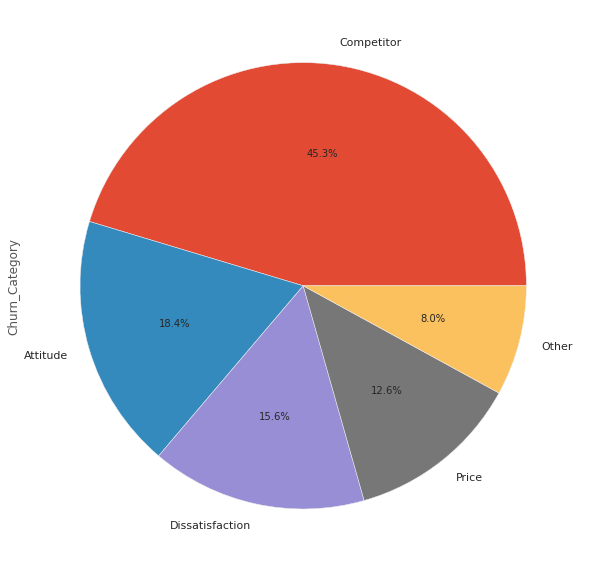

In [29]:
print(new_df["Churn_Category"].value_counts())
new_df["Churn_Category"].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,15))

Competitor made better offer                 113
Competitor had better devices                108
Attitude of support person                    78
Don't know                                    33
Attitude of service provider                  33
Price too high                                33
Competitor offered more data                  32
Product dissatisfaction                       25
Network reliability                           20
Long distance charges                         20
Competitor offered higher download speeds     20
Service dissatisfaction                       19
Limited range of services                     17
Extra data charges                            14
Moved                                         13
Poor expertise of online support              10
Lack of affordable download/upload speed       9
Deceased                                       2
Lack of self-service on Website                2
Poor expertise of phone support                1
Name: Churn_Reason, 

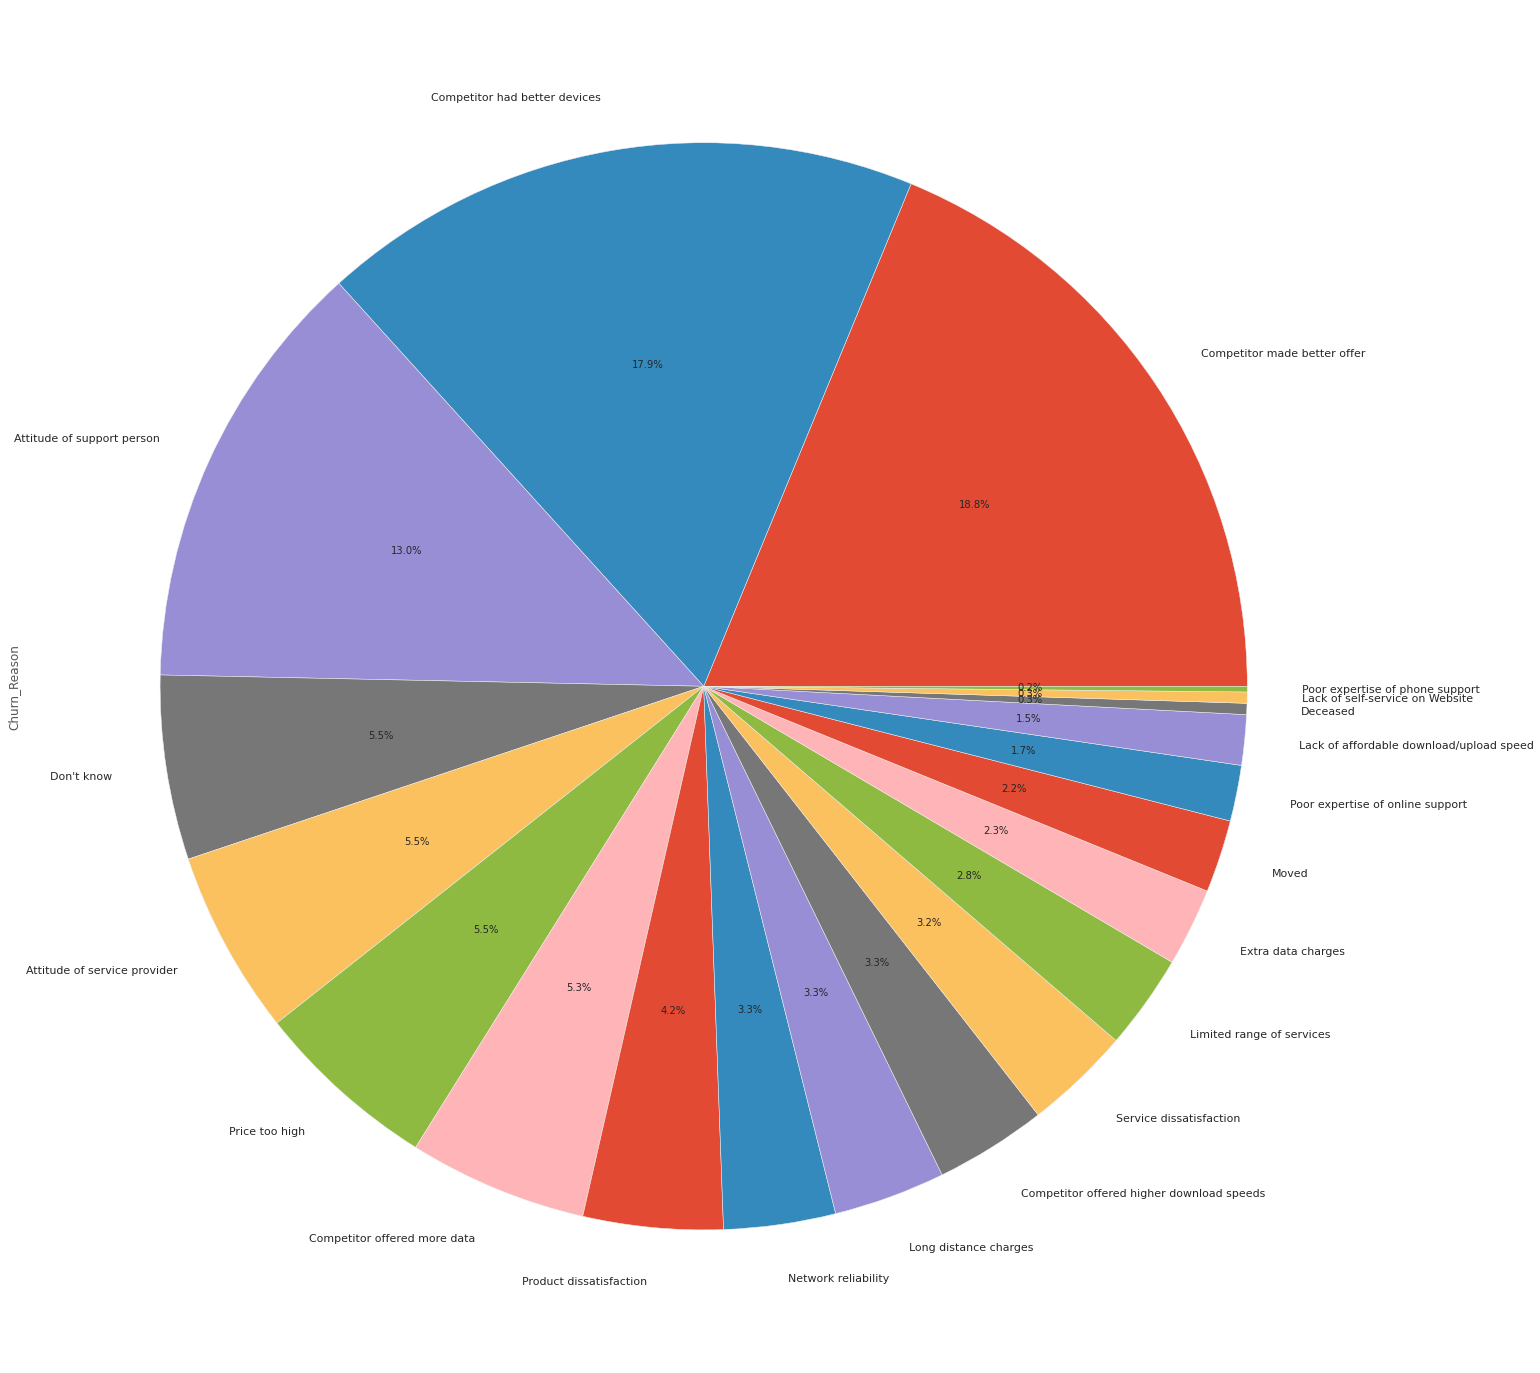

In [30]:
print(new_df["Churn_Reason"].value_counts())
new_df["Churn_Reason"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(25, 25))

For People Aged >60, they look competitors were the bulk of the reason causing them to leave. More Specifically, Competitors made better offers and had better devices. However, it is to be noted that more improvement can be done for the attitude of the staff/service quality that is provided to retain customers in this demographics

In [31]:
#Investigating Age Group 19-29 and Churned
new_df = churn_df[churn_df["Age"] == '19-29']
new_df = new_df[new_df["Customer_Status"] == 'Churned']

Competitor         148
Dissatisfaction     49
Attitude            47
Price               31
Other               29
Name: Churn_Category, dtype: int64


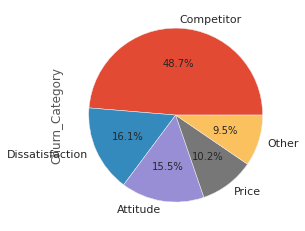

In [32]:
print(new_df["Churn_Category"].value_counts())
new_df["Churn_Category"].value_counts().plot.pie(autopct='%1.1f%%')

Competitor made better offer                 58
Competitor had better devices                46
Attitude of support person                   32
Don't know                                   23
Competitor offered higher download speeds    23
Competitor offered more data                 21
Attitude of service provider                 15
Price too high                               15
Network reliability                          12
Long distance charges                        12
Product dissatisfaction                      11
Service dissatisfaction                       8
Limited range of services                     7
Lack of self-service on Website               5
Moved                                         5
Poor expertise of online support              4
Lack of affordable download/upload speed      2
Poor expertise of phone support               2
Extra data charges                            2
Deceased                                      1
Name: Churn_Reason, dtype: int64


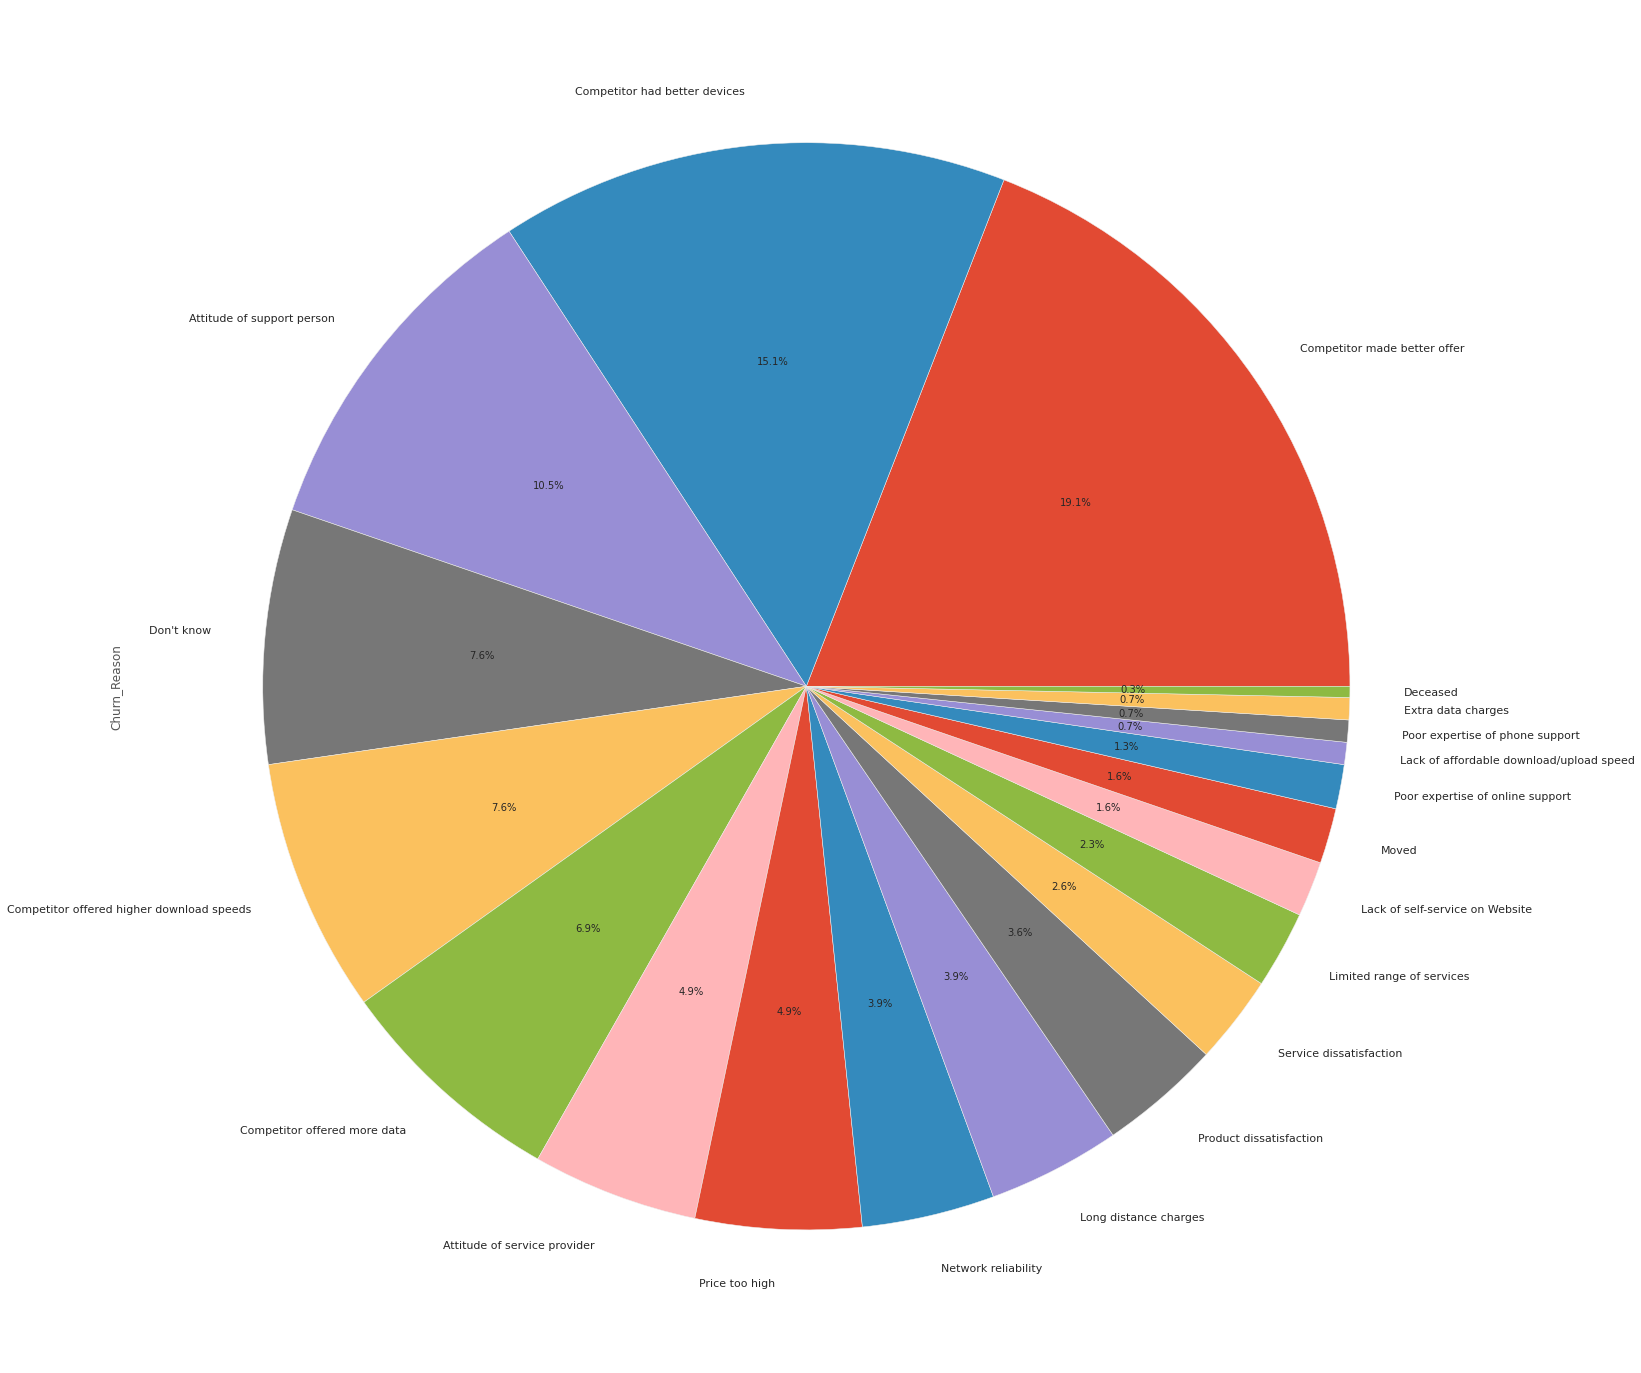

In [33]:
print(new_df["Churn_Reason"].value_counts())
new_df["Churn_Reason"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(25, 25))

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn_Reason, 

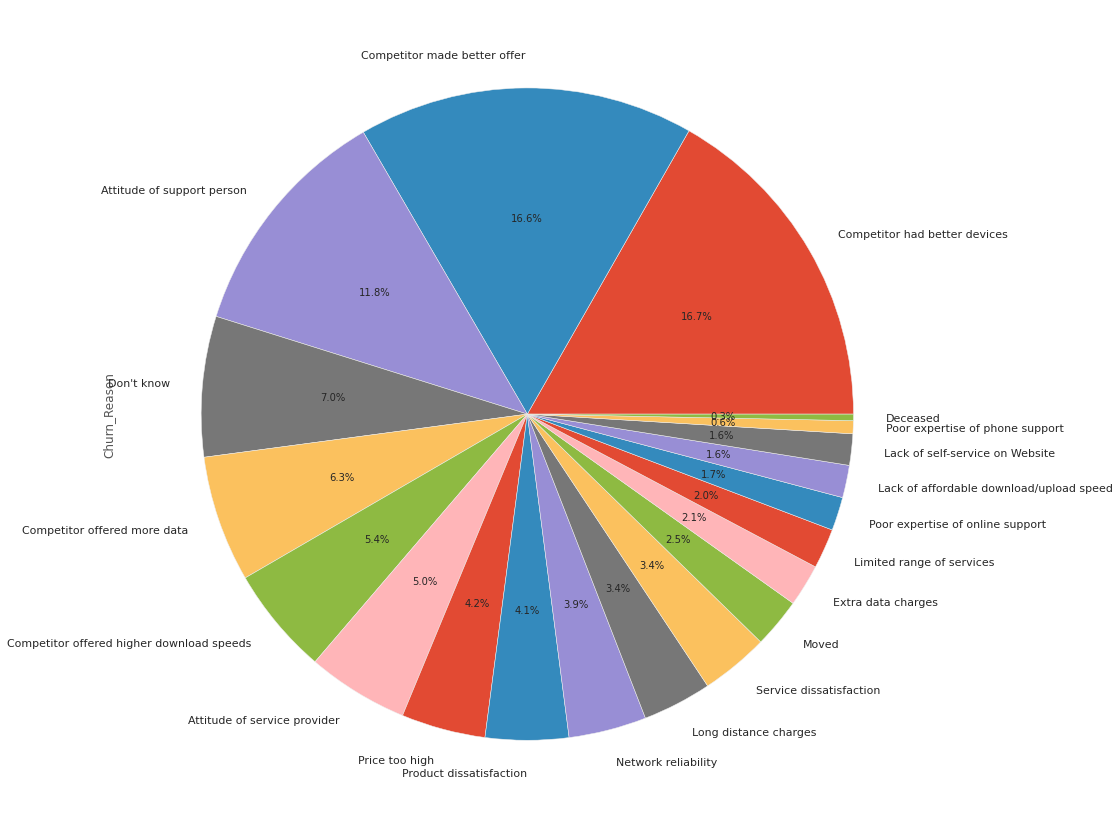

In [34]:
print(churn_df["Churn_Reason"].value_counts())
churn_df["Churn_Reason"].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15, 15))

In [35]:
count = 0
for i in new_df["Churn_Reason"]:
  if "Competitor" in i:
    count+=1
print(count)

148


In [36]:
churn_df["Churn_Reason"].value_counts()

Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: Churn_Reason, 

It can be seen that generally, Competitors are the main reason for Churn, Followed by Attitude of support person

# Services Vs Churn

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f803532ab50>,
      dtype=object)

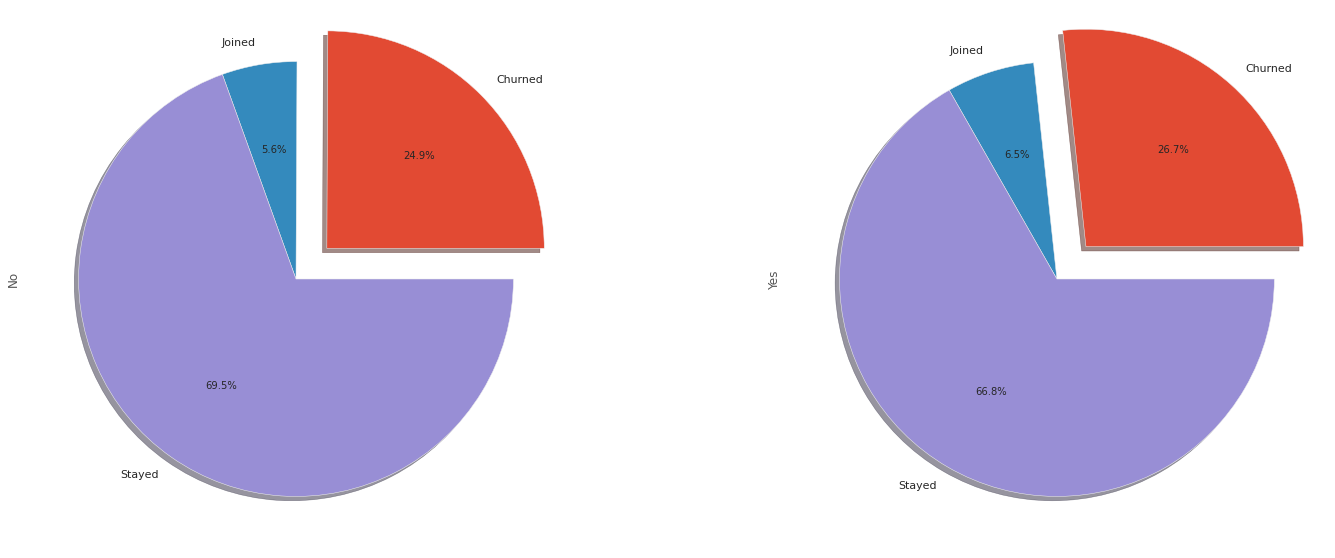

In [37]:
# Do people with [Phone Service] tend to stay? 
#Obtaining Pie Chart Proportions for Churned customers based on Phone Service
df = pd.DataFrame(churn_df[["Phone_Service", "Customer_Status"]])
df = df.groupby(['Customer_Status','Phone_Service']).size().unstack(fill_value=0)
df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0,0], shadow = True,legend=False)


Results show that it doesn't really make a huge difference. Although People who have phone line tends to leave

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f80352d5a50>,
      dtype=object)

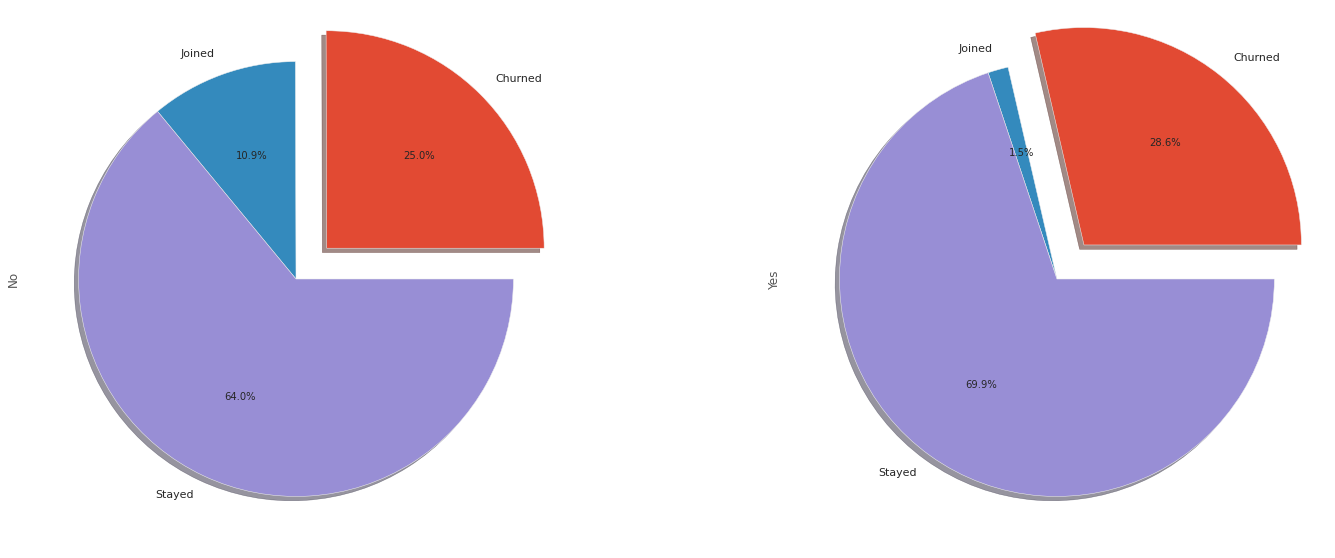

In [38]:
#Do people with [Multiple Lines] tend to stay?
#Obtaining Pie Chart Proportions for Churned customers based on [Multiple Lines]
df = pd.DataFrame(churn_df[["Multiple_Lines", "Customer_Status"]])
df = df.groupby(['Customer_Status','Multiple_Lines']).size().unstack(fill_value=0)
df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0,0], shadow = True,legend=False)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f80351cadd0>,
      dtype=object)

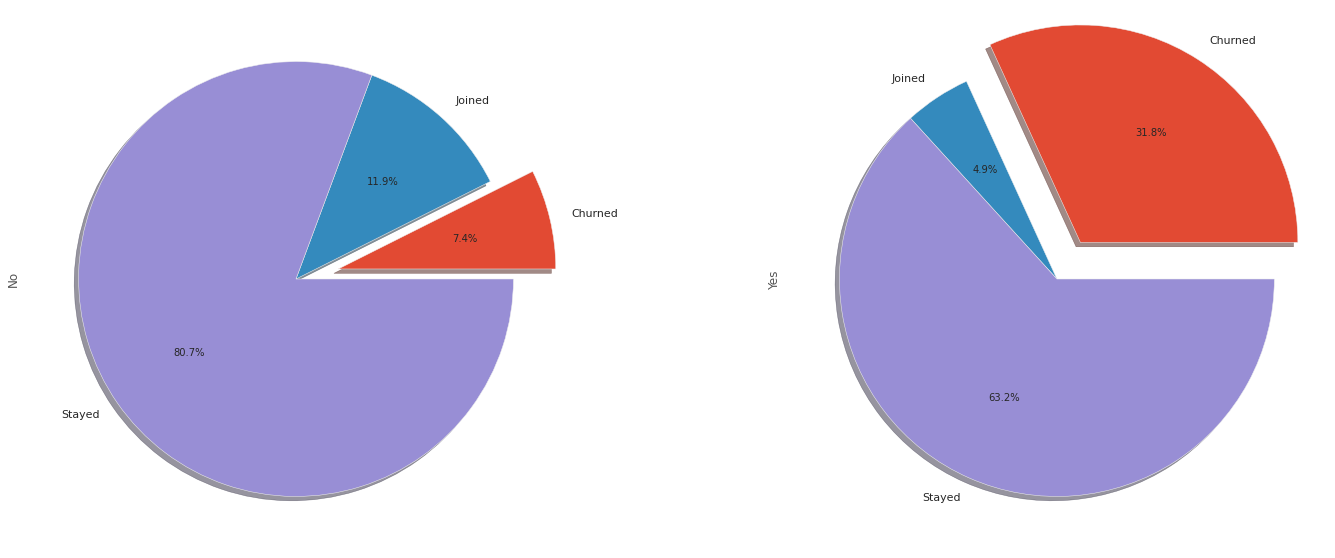

In [39]:
#Do people with [Internet_Service] tend to stay? 
#Obtaining Pie Chart Proportions for Churned customers based on [Internet_Service]
df = pd.DataFrame(churn_df[["Internet_Service", "Customer_Status"]])
df = df.groupby(['Customer_Status','Internet_Service']).size().unstack(fill_value=0)
df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0,0], shadow = True,legend=False)


People With Internet Service Tend to leave. Whereas People without Internet Service Stayed more. Could this be due to poor Internet Service? Or Could this be due to Competitors Offering Better Packages? Maybe more investigations need to be done to improve the Internet Service Provided/Customer service in the Internet Service

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8035103210>,
      dtype=object)

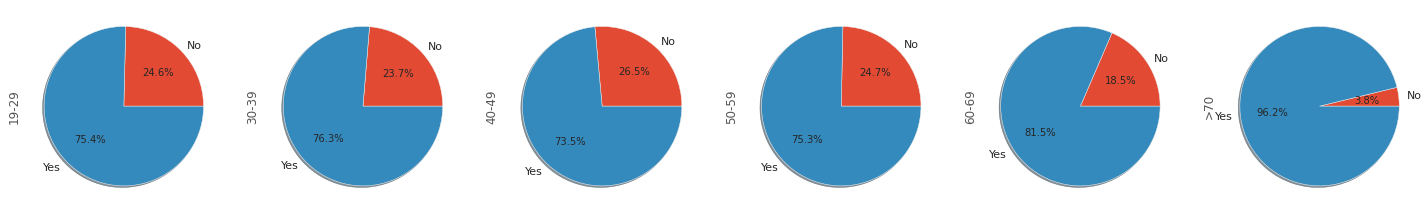

In [40]:
#Obtaining Pie Chart Proportions for Users who have Internet Service based on Age
df = pd.DataFrame(churn_df[["Age", "Internet_Service"]])
df = df.groupby(['Internet_Service','Age']).size().unstack(fill_value=0)
df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%', shadow = True,legend=False)


# Contract Vs Churn

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8034f51610>,
      dtype=object)

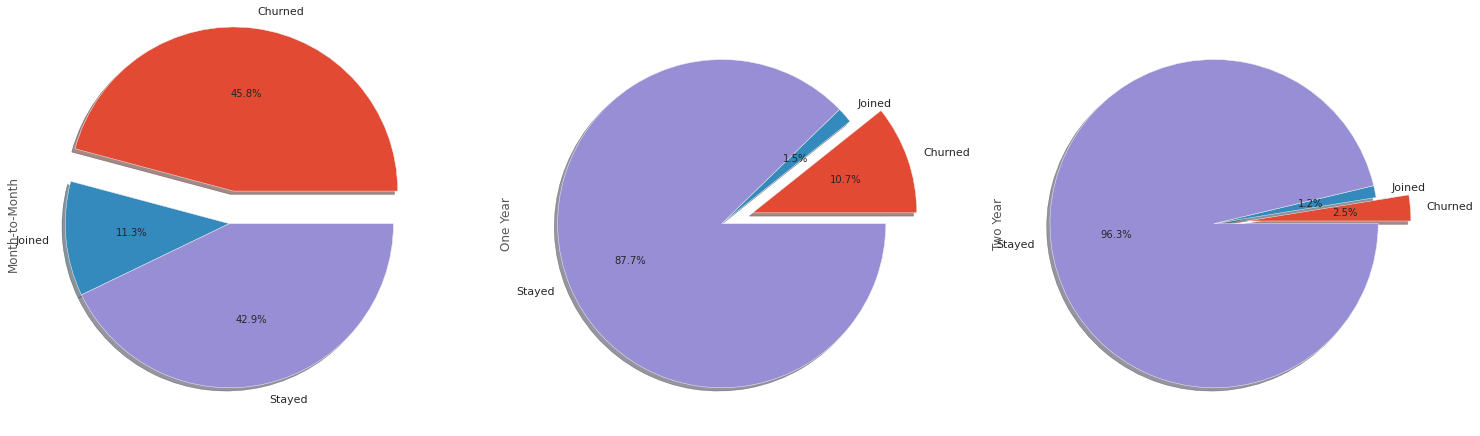

In [41]:
#Obtaining Pie Chart Proportions for Users who have Contract and Churned
df = pd.DataFrame(churn_df[["Contract", "Customer_Status"]])
df = df.groupby(['Customer_Status','Contract']).size().unstack(fill_value=0)
df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0,0], shadow = True,legend=False)


Customers who sign longer plans churn less. 
Month-to-Month plans get highest churn rates


In [42]:
#Get the median revenue generated for each Contract Group
df = pd.DataFrame(churn_df[["Contract", "Total_Revenue"]])
df.groupby('Contract').median()


,Total_Revenue
Contract,
Month-to-Month,879.445
One Year,3390.405
Two Year,4238.330


Should try to get users to sign 2 year plan as they tend to spend more than 1 year plans

# Tenure Vs Churn

In [43]:
# Filtering out only "Churned"  Customers
tenure_df =churn_df[churn_df["Tenure_in_Months"] == 1]
tenure_df=tenure_df.reset_index(drop=True)
print(tenure_df.shape)

(613, 38)


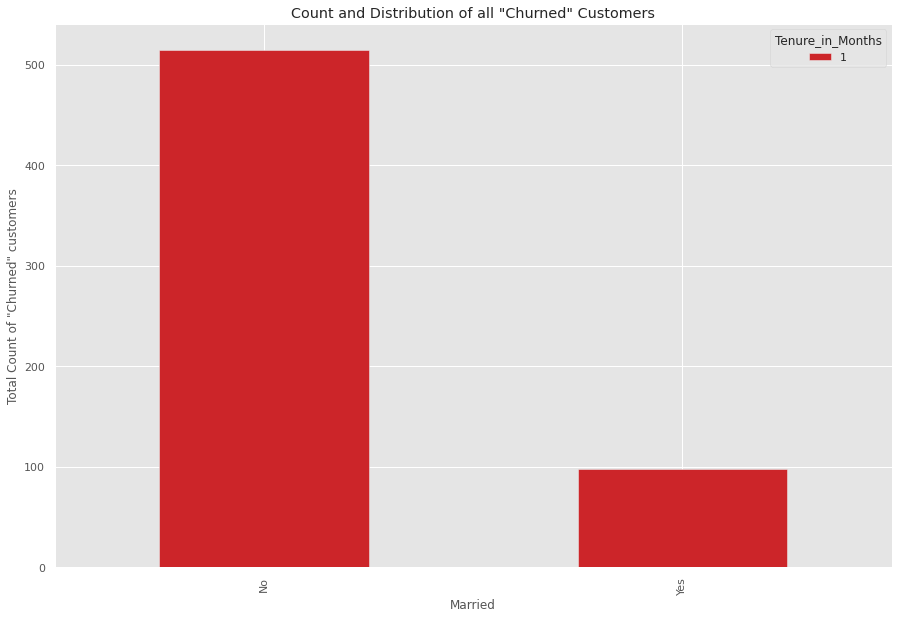

In [44]:
# plotting share/frequency of all Churned customers over the day to identify problem areas
plt.style.use('ggplot')
tenure_df.groupby(['Married','Tenure_in_Months']).Tenure_in_Months.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Count and Distribution of all "Churned" Customers')
plt.xlabel('Married')
plt.ylabel('Total Count of "Churned" customers')
plt.show()

In [45]:
churn_df["Tenure_in_Months"].describe()

count    7043.000000
mean       32.386767
std        24.542061
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure_in_Months, dtype: float64

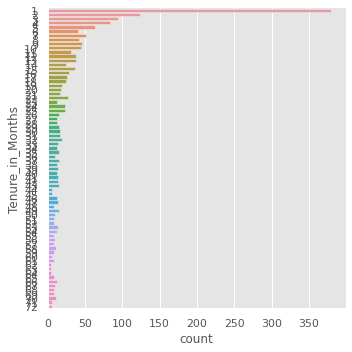

In [46]:
sb.catplot(y = "Tenure_in_Months", data = left_df, kind = "count")

Churn is very high with the first year, Afterwards stabilize.

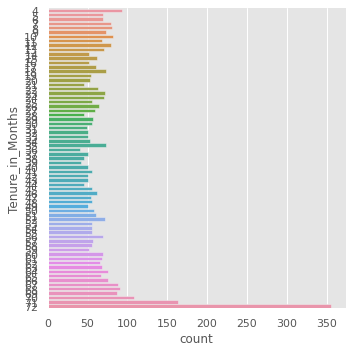

In [47]:
sb.catplot(y = "Tenure_in_Months", data = stay_df, kind = "count")

Longer Tenure tends to have higher retention

In [48]:
#Get top 20 counts
left_df["Tenure_in_Months"].value_counts().nlargest(20) #Can tell that highest churn rates occur in first 2 years

1     380
2     123
3      94
4      83
5      64
7      51
9      46
10     45
8      42
6      40
12     38
13     38
15     37
11     31
16     28
22     27
17     26
14     24
18     24
24     23
Name: Tenure_in_Months, dtype: int64

In [49]:
#Converting Tenure into ranges
copy_df = churn_df.copy()
bins= [1,13,25,38,51,64,73]
labels = ['Year 1','Year 2','Year 3','Year 4','Year 5','Year 6'] #Year 1: First Year (0mo - 12mo), Year 2: 2nd Year (13mo-24mo) ...
copy_df['Tenure_in_Months'] = pd.cut(copy_df['Tenure_in_Months'], bins=bins, labels=labels, right=False)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8034b38610>,
      dtype=object)

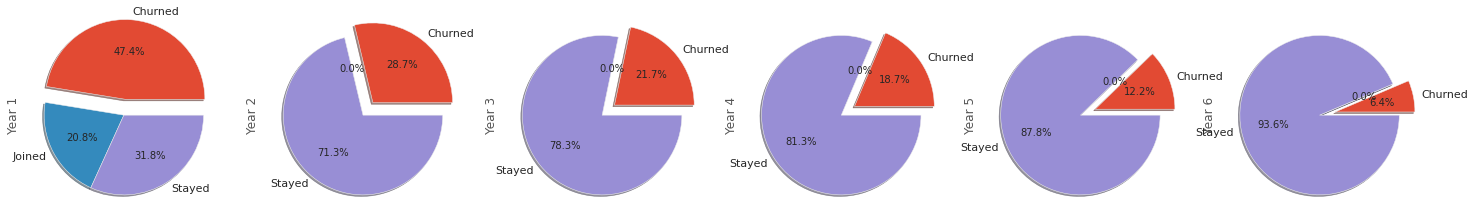

In [50]:
#Plotting the Tenure Ranges and Customer Status
df = pd.DataFrame(copy_df[["Tenure_in_Months", "Customer_Status"]])
df = df.groupby(['Customer_Status','Tenure_in_Months']).size().unstack(fill_value=0)
df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0,0], shadow = True,legend=False)


Year 1    2186
Year 6    1189
Year 2    1024
Year 5     916
Year 3     897
Year 4     831
Name: Tenure_in_Months, dtype: int64


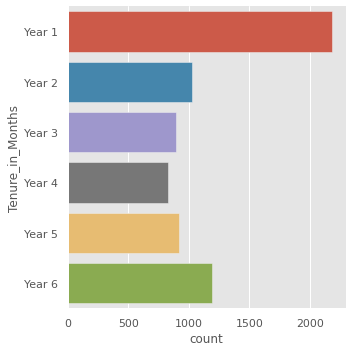

In [51]:
sb.catplot(y="Tenure_in_Months", data = copy_df, kind = "count")

print(copy_df["Tenure_in_Months"].value_counts())

As Tenure increases, customer retention also increases.
Bulk of customers have tenure in in year 1 and 6 

# City Vs Spending/Churn For Top 20


In [52]:
#Get top 10 city names
city_list = list(churn_df["City"].value_counts().nlargest(10).keys())

In [53]:
#Filter the data to only top 10 cities
city_df = churn_df[churn_df["City"].apply(lambda x: x in city_list)]

In [54]:
city_df["City"].value_counts()

Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Fresno            61
Long Beach        60
Oakland           52
Escondido         51
Stockton          44
Name: City, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f803478f4d0>,
      dtype=object)

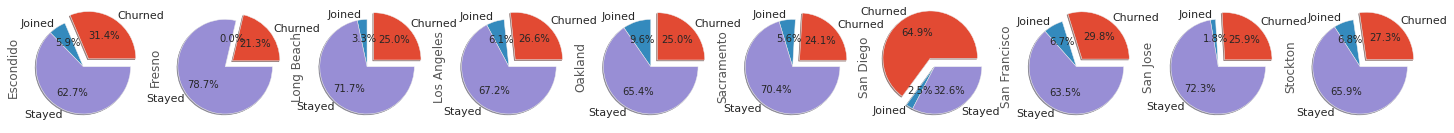

In [55]:
#Plot pie chart for 20 cities
df = pd.DataFrame(city_df[["City", "Customer_Status"]])
df = df.groupby(['Customer_Status','City']).size().unstack(fill_value=0)
df.plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0,0], shadow = True,legend=False)


San Diego Churned the most of 64.9%. On top of this, they have 2nd biggest customer base of 285 customers located there

In [56]:
#Get the mean revenue generated for each City groups
df = pd.DataFrame(city_df[["City", "Total_Revenue"]])
df.groupby('City').mean().sort_values(by = 'Total_Revenue',ascending=False)

,Total_Revenue
City,
Sacramento,3271.961481
Fresno,3187.381148
Long Beach,3098.952000
Escondido,3056.858824
Oakland,2972.391538
San Francisco,2951.884519
San Jose,2914.985357
Los Angeles,2910.325017
Stockton,2680.244318


San Diego Interestingly generates the least total_revenue per customer

In [57]:
#Investigating San Diego
sand_df = churn_df[churn_df["City"] == "San Diego"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8034788590>],
      dtype=object)

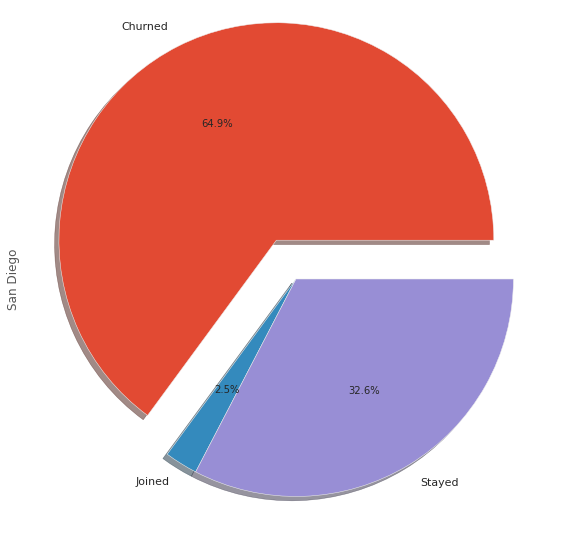

In [58]:
#San Diego Pie plot
sand_df.groupby(['Customer_Status','City']).size().unstack(fill_value=0).plot.pie(subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0,0], shadow = True,legend=False)


In [59]:
sand_df["Churn_Reason"].value_counts()

Competitor made better offer        146
Don't know                           15
Attitude of support person            8
Competitor had better devices         6
Attitude of service provider          2
Long distance charges                 2
Product dissatisfaction               2
Poor expertise of online support      2
Lack of self-service on Website       1
Network reliability                   1
Name: Churn_Reason, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8037746550>],
      dtype=object)

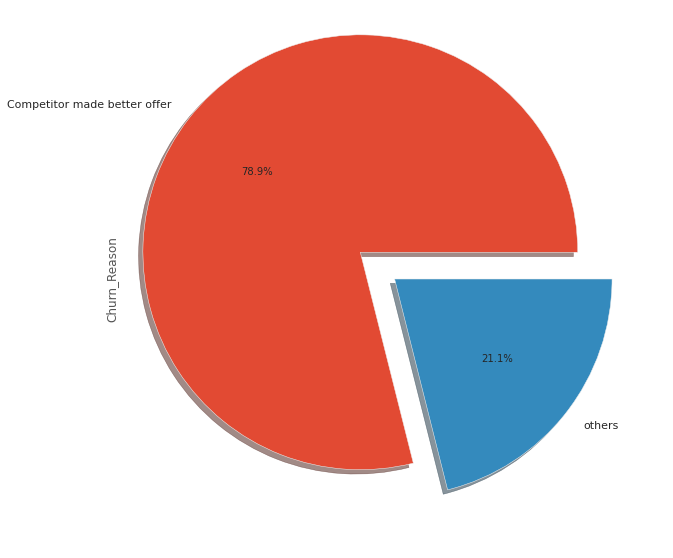

In [60]:
#Get pie chart in terms of competitor made better offer and "others"
hi = sand_df["Churn_Reason"].value_counts()
new_list = [0,0]
for key,value in pd.DataFrame(hi).iterrows():
  if key == 'Competitor made better offer':
    new_list[0] = value[0]
  else:
    new_list[1] += value[0]

df = pd.DataFrame({'Churn_Reason':new_list}, index = ["Competitor made better offer","others"])
df.plot.pie(y = "Churn_Reason", subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0], shadow = True,legend=False)

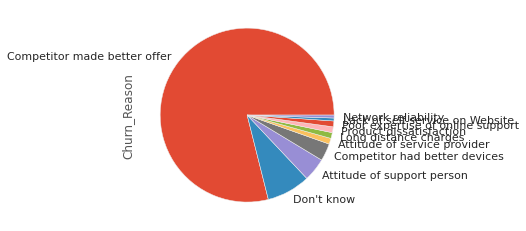

In [61]:
sand_df["Churn_Reason"].value_counts().plot.pie()

In [62]:
sand_df["Age"].value_counts()

19-29    62
60-69    56
50-59    44
40-49    42
30-39    39
>70      39
Name: Age, dtype: int64

Seems that in San Diego, the competitors are making better offers there. Causing Churn.

In [63]:
#Investigating Sacramento
sacr_df = churn_df[churn_df["City"] == "Sacramento"]

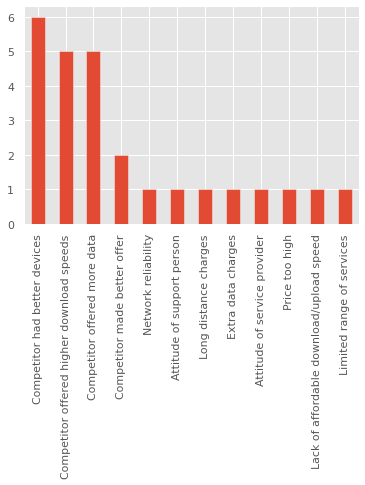

In [64]:
sacr_df["Churn_Reason"].value_counts().plot.bar()

In [65]:
sacr_df["Age"].value_counts()

40-49    23
50-59    22
19-29    19
60-69    18
30-39    15
>70      11
Name: Age, dtype: int64

Main Reasons for Churn in Sacramento is Competitor has better devices and more data provided. 